### ETAS: Japan 2016
#### 22 November 2016, m=6.9
Time: 2016-11-21 20:59:49 (UTC)

Location:
37.392°N 141.403°E

Depth
11.3 km


In [13]:
#
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import datetime as dtm
import matplotlib.dates as mpd
import pytz
tzutc = pytz.timezone('UTC')

#import operator
import math
import random
import numpy
import scipy
import scipy.optimize as spo
from scipy import interpolate
import itertools
import sys
#import scipy.optimize as spo
import os
import operator
#from PIL import Image as ipp
import multiprocessing as mpp
#
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import json
import pickle
#
import geopy.distance
#from geopy.distance import vincenty
#from geopy.distance import great_circle
#
#import shapely.geometry as sgp
#
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from geographiclib.geodesic import Geodesic as ggp
#
#import ANSStools as atp
from yodiipy import ANSStools as atp
#
import contours2kml
import globalETAS as gep
import global_etas_auto as ggep
from eq_params import *
#
from nepal_figs import *
import optimizers
#
import random
import geopy



In [15]:
# event was some time on the 24th or maybe late the 23rd. this, plus defaults, should find the event:
#to_dt = dtm.datetime(2016,8,25, tzinfo=pytz.timezone('UTC'))
to_dt = dtm.datetime.now(pytz.timezone('UTC'))
#
Lr_factor = 10.
# define these from the t_now in the actual etas object, in the event that we load it from pickle,
#  rather than calc it here.
#f_path = '/home/myoder/Dropbox/Research/etas/italy_2016_10/etas_{}'.format(to_dt)
#f_root = 'etas_2016'
#
# USGS:
# Time
# 2016-11-21 20:59:49 (UTC)
# Location
# 37.392°N 141.403°E
# Depth
# 11.3 km

t0 = dtm.datetime(2016, 11, 21, 20, 59, 49, tzinfo=pytz.timezone('UTC'))
t_ms = t0
to_dt = dtm.datetime.now(pytz.utc)
#Location
lat0 = 37.392
lon0 = 141.403
m0 = 6.9
d_lat=4.
d_lon=4.
lats = [lat0-d_lat, lat0+d_lat]
lons = [lon0-d_lon, lon0+d_lon]
event_name = 'Honshu_2016_11_21'
#to_dt = t0-dtm.timedelta(hours=2)
#to_dt = dtm.datetime.now(pytz.utc)
#
#etas = ggep.auto_etas(to_dt=to_dt, Lr_factor=Lr_factor, dt_0=5)
#italy_prams = {'do_recarray': True, 'D_fract': 1.5,
#                't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
#                't_now':to_dt, 
#                'lats': [42.,43.5], 'p': 1.1, 'b1': 1.0, 'mc': 2.5, 'q': 1.5,
#                'lons': [12.,15.], 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
#                'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76}
eq_prams = {'do_recarray': True, 'D_fract': 1.5,
               't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
               't_now':to_dt, 
               'lats': lats, 'p': 1.1, 'b1': 1.0, 'mc': 2.5, 'q': 1.5,
               'lons': lons, 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
               'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76, 'etas_range_padding':.5*(d_lat+d_lon)}

In [16]:
#nz_cat0 = test_cat = atp.cat_from_geonet(lats=lats, lons=lons, m_c=2.5, date_from=dtm.datetime(2000,1,1,tzinfo=atp.tzutc),
#                              date_to=dtm.datetime.now(atp.tzutc))
#nz_cat = gep.make_ETAS_catalog_mpp(incat=nz_cat0)

#etas = gep.ETAS_mpp(n_cpu=2*mpp.cpu_count(), catalog=nz_cat, **eq_prams)
etas = gep.ETAS_mpp(n_cpu=2*mpp.cpu_count(), catalog=None, **eq_prams)
#
# we've run this; we can reload it from pickle:
#with open('data/etas_201610.pkl', 'rb') as fin:
#    etas = pickle.load(fin)
#
#
# TODO: do this with os.path.join() for win, etc. compatibility.
f_path = '/home/myoder/Dropbox/Research/etas/{}/etas_{}'.format(event_name,etas.t_now)
f_root = 'etas_japan_2016_11'

begin globalETAS.__init()__
Overriding t0 (etas catalog start date/time) for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2011-11-24 14:01:36.081947+00:00
fetch and process catalog.
etas_prams:  {'lats': [33.392, 41.392], 'd_tau': 2.28, 'dmstar': 1.0, 'd_lambda': 1.76, 'mc': 2.5, 'p': 1.1, 'fit_factor': 1.0, 'date_range': [datetime.datetime(1990, 1, 1, 0, 0, tzinfo=<UTC>), datetime.datetime(2016, 11, 22, 14, 1, 36, 81947, tzinfo=<UTC>)], 'b2': 1.5, 'incat': None, 'do_recarray': True, 'q': 1.5, 'lons': [137.403, 145.403], 'b1': 1.0, 'D_fract': 1.5}
data handle fetched...
 no file.
R:  <multiprocessing.pool.ApplyResult object at 0x7f870dbe8c50>
R:  <multiprocessing.pool.ApplyResult object at 0x7f870dbe8198>
results fetched.
catalog fetched and processed.
ETAS over etas_cat_range/xyz_range:  ([0, 13728], None)
make_etas():
etas_mpp worker xyz_range:  [0, 1600]
begin globalETAS.__init()__
Overriding t0 (etas catalog start date/time) for ETAS calculations. usi

In [17]:
#print(etas.t0, etas.t_now, etas.t_forecast, etas.catalog[-1])
print(to_dt)
print(etas.t_0, mpd.num2date(etas.t_forecast), etas.t_now, t_ms)
#print(etas.catalog[-5:])

2016-11-22 14:01:36.081947+00:00
1990-01-01 00:00:00+00:00 2016-11-22 14:01:36.081950+00:00 2016-11-22 14:01:36.081947+00:00 2016-11-21 20:59:49+00:00


ms:  (datetime.datetime(2016, 11, 21, 20, 59, 49, 10000), 37.3917, 141.4025, 6.9, 11.35, 736289.8748728009, 48.97788193684464, 779.6833617191187, 2.851483496593477e-05, 14.791083881682088, 96.81422218205643, 0.002520032164445069, 1.0, 1.1, 1.5, array([  1.70398972e+08,   1.18874408e+03]), array([[ 0.9488513 , -0.31572332],
       [ 0.31572332,  0.9488513 ]]), 693.0) 141.4025 37.3917


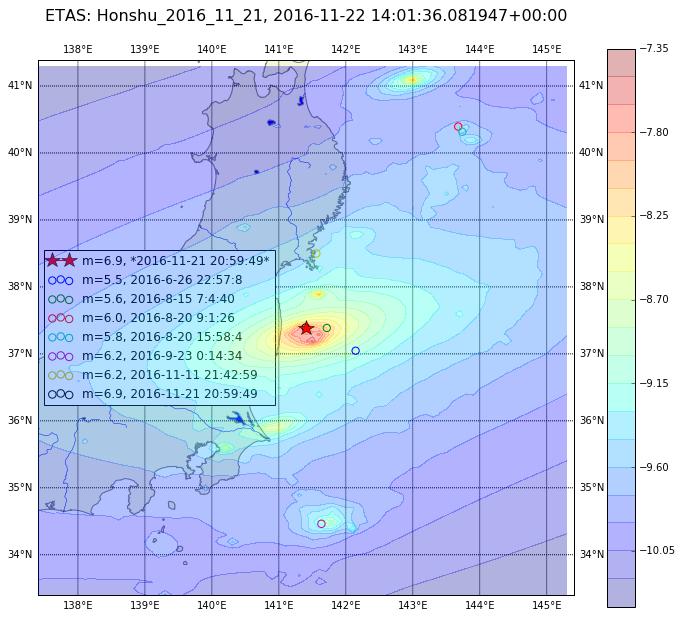

In [18]:
fg=plt.figure(0, figsize=(12,10))
ax=plt.gca()
etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='f', alpha=.3, ax=ax)
#
#mainshock = sorted(etas.catalog, key=lambda rw: rw['mag'])[-1]
#print('mainshock: ', mainshock)
# get mainshock. it's an m>6 event in the last week or so... this is subjective.
# if we just look for the biggest event, we get the L'Aquila event, so we'll need to be more creative...
# or just specify it.

mainshock = etas.catalog[-1]
for j,eq in enumerate(reversed(etas.catalog)):
    #print('*** ', pytz.utc.localize(eq['event_date'].astype(dtm.datetime)))
    if pytz.utc.localize(eq['event_date'].astype(dtm.datetime))<etas.t_now-dtm.timedelta(days=180): break
    if eq['mag']>mainshock['mag']:
        mainshock = eq
        #
    #
#
print('ms: ', mainshock, mainshock['lon'], mainshock['lat'])
x,y = etas.cm(mainshock['lon'], mainshock['lat'])

#print('mm: ', max(etas.catalog['mag']))


#
# let's get everything m>6 in the last 6 months?
m6s = [rw for rw in etas.catalog if rw['mag'] >= 5.5
       and pytz.utc.localize(rw['event_date'].astype(dtm.datetime))>t_ms-dtm.timedelta(days=180)]

# plot mainshock:
dt = mainshock['event_date'].astype(dtm.datetime)
dt=t0
dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
#etas.cm.plot([x], [y], latlon=False, marker='*', color='r', ms=16, zorder=11,
#                   label='m={}, {}'.format(mainshock['mag'], dt_str))
etas.cm.plot([lon0], [lat0], latlon=False, marker='*', color='r', ms=16, zorder=11,
                   label='m={}, *{}*'.format(m0, dt_str))

ax.set_title('ETAS: {}, {}\n\n'.format(event_name, etas.t_now), size=16)
for j,m6 in enumerate(m6s):
    clr = colors_[j%len(colors_)]
    #
    dt = m6['event_date'].astype(dtm.datetime)
    dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    etas.cm.scatter(m6['lon'], m6['lat'], s=3*(m6['mag']+12.), edgecolors=clr, 
                          c='none', marker='o', zorder=11, label='m={}, {}'.format(m6['mag'], dt_str))
    #
plt.gca().legend(loc='lower right')

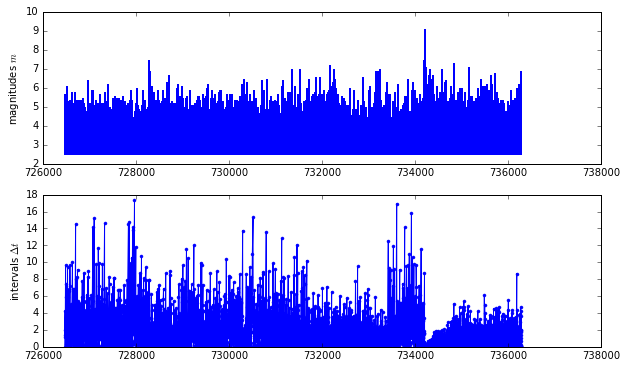

In [19]:
plt.figure(figsize=(10,6))
plt.clf()
ax1 = plt.subplot('211')
ax2 = plt.subplot('212', sharex=ax1)
#ax1.plot(etas.catalog['event_date'], etas.catalog['mag'], marker='.', ls='-', label='mag')
f_dates = [mpd.date2num(x.astype(dtm.datetime)) for x in etas.catalog['event_date']]
ax1.vlines(f_dates, (min(etas.catalog['mag'])-.5)*numpy.ones(len(etas.catalog)), 
           etas.catalog['mag'], lw=2., label='mag', color='b')
ax2.plot(f_dates[1:], numpy.diff(f_dates,1), '.-')

ax2.set_ylabel('intervals $\Delta t$')
ax1.set_ylabel('magnitudes $m$')

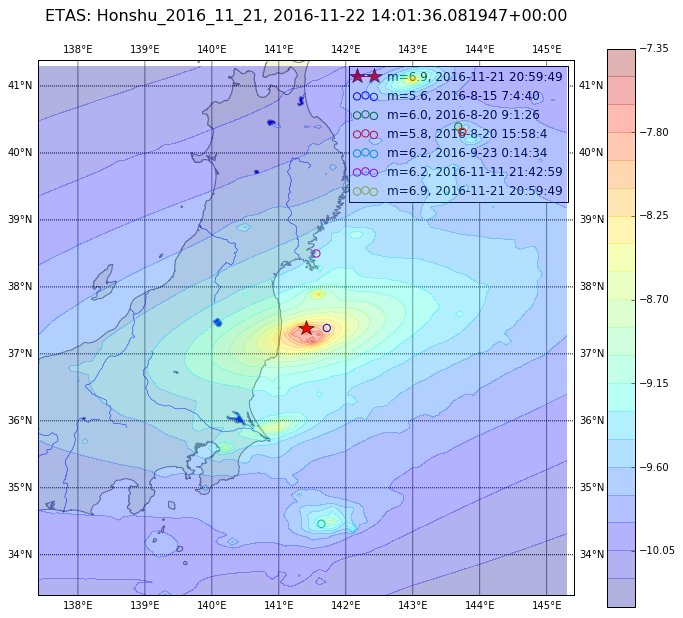

In [20]:
fg=plt.figure(0, figsize=(12,10))
ax=plt.gca()
etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='f', alpha=.3, ax=ax)

#
# let's get everything m>6 in the last 6 months?
m6s = [rw for rw in etas.catalog if rw['mag'] >= 5.5 
       and pytz.utc.localize(rw['event_date'].astype(dtm.datetime))>to_dt-dtm.timedelta(days=120)]
#
# plot mainshock:
dt = mainshock['event_date'].astype(dtm.datetime)
etas.cm.plot([x], [y], latlon=False, marker='*', color='r', ms=16, zorder=11,
                   label='m={}, {}'.format(mainshock['mag'], dt_str))
ax.set_title('ETAS: {}, {}\n\n'.format(event_name, etas.t_now), size=16)
for j,m6 in enumerate(m6s):
    clr = colors_[j%len(colors_)]
    #
    dt = m6['event_date'].astype(dtm.datetime)
    dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    etas.cm.scatter(m6['lon'], m6['lat'], s=3*(m6['mag']+12.), edgecolors=clr, 
                          c='none', marker='o', zorder=11, label='m={}, {}'.format(m6['mag'], dt_str))
    #
plt.gca().legend(loc=0)

In [21]:
print(['{},{}\n'.format(rw['event_date'], rw['mag'] ) for rw in etas.catalog if rw['mag'] >= 5.5])
len(['{},{}\n'.format(rw['event_date'], rw['mag'] ) for rw in etas.catalog if rw['mag'] >= 5.5
     and rw['event_date'].astype(dtm.datetime)>dtm.datetime(2016,10,20)])



['1990-01-09T21:11:17.630000-0600,5.7\n', '1990-02-20T00:53:39.890000-0600,6.1\n', '1990-05-31T20:22:11.590000-0500,5.8\n', '1990-08-04T22:36:22.290000-0500,5.8\n', '1991-01-24T15:36:27.020000-0600,5.5\n', '1991-05-07T08:09:28.750000-0500,6.4\n', '1991-08-06T09:49:30.570000-0500,5.9\n', '1991-09-03T03:44:48.600000-0500,5.9\n', '1992-01-21T19:06:55.510000-0600,5.6\n', '1992-02-01T13:04:04.530000-0600,5.7\n', '1992-05-07T01:23:36.150000-0500,5.8\n', '1992-07-15T19:00:41.140000-0500,5.6\n', '1992-07-18T03:20:00.110000-0500,5.5\n', '1992-07-18T03:36:58.700000-0500,6.2\n', '1992-07-18T03:39:05.790000-0500,6.1\n', '1992-07-18T05:20:11.940000-0500,6.1\n', '1992-07-18T05:59:39.870000-0500,5.5\n', '1992-07-18T06:48:20.960000-0500,5.5\n', '1992-07-18T07:02:40.670000-0500,5.5\n', '1992-07-18T08:56:54.480000-0500,5.8\n', '1992-07-18T13:12:13.180000-0500,5.5\n', '1992-07-18T15:55:12.240000-0500,5.6\n', '1992-07-18T16:18:57.480000-0500,5.6\n', '1992-07-24T21:53:28.330000-0500,5.9\n', '1992-07-28T21:

2

In [22]:
for rw in m6s:
    print(rw)

(datetime.datetime(2016, 8, 15, 7, 4, 40, 930000), 37.3861, 141.7168, 5.6, 33.0, 736191.2949181712, 10.964781961431845, 31.554486979880263, 0.002828130424008033, 3.311311214825911, 2.9462696629929894, 0.07129724533160697, 1.0, 1.1, 1.5, array([  1.73490479e+08,   8.52600025e+01]), array([[ 0.94887842, -0.3156418 ],
       [ 0.3156418 ,  0.94887842]]), 60.0)
(datetime.datetime(2016, 8, 20, 9, 1, 26, 210000), 40.3942, 143.6796, 6.0, 10.0, 736196.375997801, 17.378008287493753, 84.65108954313368, 0.0006874066346783245, 5.248074602497728, 8.62857663444466, 0.02549212761626736, 1.0, 1.1, 1.5, array([  1.67198406e+08,   2.64651054e+02]), array([[ 0.93790454, -0.34689346],
       [ 0.34689346,  0.93790454]]), 71.0)
(datetime.datetime(2016, 8, 20, 15, 58, 4, 440000), 40.3162, 143.7408, 5.8, 10.0, 736196.6653291667, 13.803842646028846, 51.68289565050985, 0.0013943011214220353, 4.168693834703355, 5.0420346659731, 0.04263236419296551, 1.0, 1.1, 1.5, array([  1.68231012e+08,   1.20041626e+02]), arr

In [23]:
## hey, pickling works with the new ETAS objects (or at least it appears to...):
# with open('data/etas_201610.pkl', 'wb') as fpkl:
#     pickle.dump( etas, fpkl)    
#
#with open('data/etas_201610.pkl', 'rb') as fin:
#    etas2 = pickle.load(fin)
#
#print(etas2.catalog[0:5])
# TODO: we want the datetime part of the filename to come from the etas object itself, for purposes of
# integrity. BUT, we want this script to be a bit more portable, so we should replace all the etas
# references/object name to just 'etas'
#
etas.export_kml(os.path.join(f_path, '{}_{}.kml'.format(f_root, str(etas.t_now).replace(' ', '_'))))
etas.export_xyz(os.path.join(f_path, '{}_{}.xyz'.format(f_root, str(etas.t_now).replace(' ', '_'))))
fg.savefig(os.path.join(f_path, '{}_{}.png'.format(f_root, str(etas.t_now).replace(' ', '_'))))

with open (os.path.join(f_path, '{}_{}.pkl'.format(f_root, str(etas.t_now).replace(' ', '_'))), 'wb') as fpkl:
    pickle.dump(etas, fpkl)


kml bottom, top:  0 20


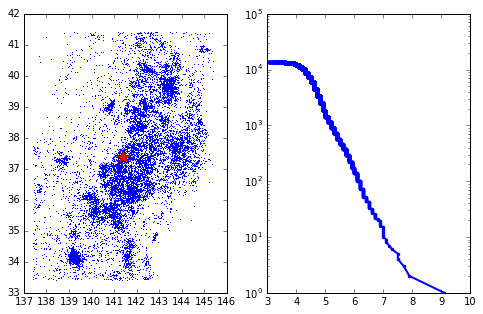

In [24]:
plt.figure(figsize=(8,5))
plt.clf()
ax1=plt.subplot('121')
ax2=plt.subplot('122')
ax1.plot(etas.catalog['lon'], etas.catalog['lat'], ',')
ax1.plot([mainshock['lon']], [mainshock['lat']], marker='*', color='r', ms=16, zorder=11)
#
ax2.plot([m for m in reversed(sorted(etas.catalog['mag']))], numpy.arange(1,len(etas.catalog)+1),
         '.-', lw=2.)
ax2.set_yscale('log')

In [25]:
#print(etas.mc, etas.mc_etas)

In [26]:
# plot a cross-section of ETAS. let's get smart about this and do a PCA on the xyz field...
#
#plt.figure()
##my_xy = [[x,y,z] for x,y in zip(etas.catalog['lon'], etas['lat']) if x>=42.25 and x<=42.75]
#my_xyz = [[x,y,z] for x,y,z in etas.ETAS_array if y>=42.25 and y<=42.75]
#plt.figure(figsize=(8,6))
#plt.plot([x for x,y,z in my_xyz ], [z for x,y,z in my_xyz], '.')

In [27]:
mycat = atp.catfromANSS(lon=lons, lat=lats, minMag=2.5,
                        dates0=[dtm.datetime(2005,1,1, tzinfo=tzutc), None], Nmax=None, fout=None, rec_array=True)


data handle fetched...
 no file.


data handle fetched...
 no file.
[ (datetime.datetime(2016, 11, 21, 21, 50, 56, 170000), 37.3028, 141.6021, 4.9, 10.0, 736289.9103723379)
 (datetime.datetime(2016, 11, 21, 22, 17, 16, 610000), 37.1857, 141.5343, 4.4, 10.0, 736289.9286644676)
 (datetime.datetime(2016, 11, 21, 23, 23, 17, 190000), 37.3847, 141.3519, 4.6, 10.0, 736289.9745045139)
 (datetime.datetime(2016, 11, 21, 23, 39, 54, 840000), 37.2272, 141.419, 4.9, 24.12, 736289.9860513889)
 (datetime.datetime(2016, 11, 22, 1, 38, 0, 150000), 37.1911, 141.4776, 5.1, 10.79, 736290.0680572917)]
2016-11-21T19:38:00.150000-0600


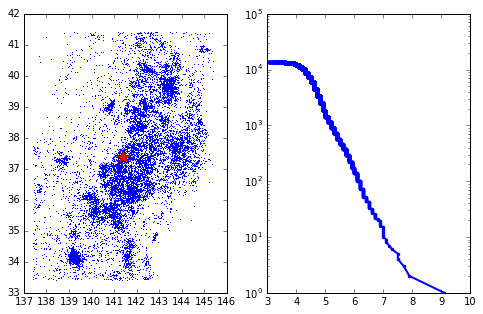

In [28]:
test_cat = atp.catfromANSS(lat=lats, lon=lons, minMag=1.5,
                           dates0=[dtm.datetime(1990,1,1, tzinfo=pytz.utc), dtm.datetime.now(pytz.utc)])


plt.figure()
plt.clf()
#plt.plot(test_cat['lon'], test_cat['lat'], '.')
print(test_cat[-5:])
print(max(test_cat['event_date']))

plt.figure(figsize=(8,5))
plt.clf()
ax1=plt.subplot('121')
ax2=plt.subplot('122')
ax1.plot(test_cat['lon'], test_cat['lat'], ',')
ax1.plot([mainshock['lon']], [mainshock['lat']], marker='*', color='r', ms=16, zorder=11)
#
ax2.plot([m for m in reversed(sorted(test_cat['mag']))], numpy.arange(1,len(test_cat)+1),
         '.-', lw=2.)
ax2.set_yscale('log')

In [29]:
test_cat = atp.cat_from_geonet(lats=lats, lons=lons, m_c=2.5, date_from=dtm.datetime(2000,1,1,tzinfo=atp.tzutc),
                              date_to=dtm.datetime.now(atp.tzutc))

In [30]:
#min(etas.catalog['mag'])

3.0